In [81]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 知识点汇总

pandas 库中有专门计算移动平均值的函数：rolling 函数  
<pre>
# 计算移动平均值
city_df['MA_10'] = city_df['avg_temp'].rolling(window=10).mean()
global_df['MA_10'] = global_df['avg_temp'].rolling(window=10).mean()
</pre>

添加其他图标元素 
 图表标题：<pre>plt.title()</pre>
坐标轴标题：<pre>plt.xlabel()和 plt.ylabel()</pre> 
    图例：<pre>plt.legend()</pre>  
参考地址：  

https://pandas.pydata.org/pandas-docs/stable/visualization.html  
http://python.jobbole.com/85106/  
https://liam0205.me/2014/09/11/matplotlib-tutorial-zh-cn/


## 1 数据库查询语句  
* 获取距离北京最近的城市天津的城市信息
<pre>
SELECT *
FROM CITY_LIST
WHERE COUNTRY='China' AND CITY='Tianjin'
</pre>
* 获取天津的平均气温数据
<pre>
SELECT *
FROM city_data
WHERE CITY='Tianjin' AND COUNTRY='China'
</pre>
* 获取1820起的全球的平均气温
<pre>
SELECT *
FROM global_data
WHERE year>=1820
</pre>

## 2 读取csv文件并绘图

### 2.1 读取天津的气温csv文件

In [82]:
tj_data=pd.read_csv('city_data_tianjin.csv')

In [83]:
tj_data.head()

,year,city,country,avg_temp
0,1820,Tianjin,China,10.18
1,1821,Tianjin,China,11.51
2,1822,Tianjin,China,11.50
3,1823,Tianjin,China,10.96
4,1824,Tianjin,China,11.96


** 使用matplotlib画出趋势图 **  
设置移动平均值 使用 ** rolling函数 **

In [84]:
tj_rolling_df=tj_data['avg_temp'].rolling(window=10).mean()
tj_rolling_df.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: avg_temp, dtype: float64

In [85]:
# x=tj_data['year']
x=tj_rolling_df.index

In [86]:
# y=tj_data['avg_temp']
y=tj_rolling_df

In [87]:
plt.plot(x,y,lw=1,color="blue",label="天津气温")

* 设置横纵坐标的label

In [88]:
plt.ylabel('气温移动平均值')
plt.xlabel('时间推移量')

### 2.2 读取全球的平均气温并绘图

In [89]:
global_data=pd.read_csv('global_data.csv')

In [90]:
global_data.head()

,year,avg_temp
0,1820,7.62
1,1821,8.09
2,1822,8.19
3,1823,7.72
4,1824,8.55


* 计算移动平均值

In [91]:
global_rolling_df=global_data['avg_temp'].rolling(window=10).mean()
global_rolling_df.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: avg_temp, dtype: float64

In [92]:
type(global_rolling_df)

pandas.core.series.Series

In [93]:
global_rolling_df.index

RangeIndex(start=0, stop=196, step=1)

** 画全球的平均气温**

In [94]:
x_all=global_rolling_df.index

In [95]:
y_all=global_rolling_df

In [96]:
plt.plot(x_all,y_all,lw=1,color="red",label="全球气温")


* 设置标题

In [97]:
plt.title('天津与全球气温变化趋势对比图')

* 为了matplotlib正常显示中文

In [98]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

* 使用legend添加图例

In [99]:
plt.legend(loc='upper left')

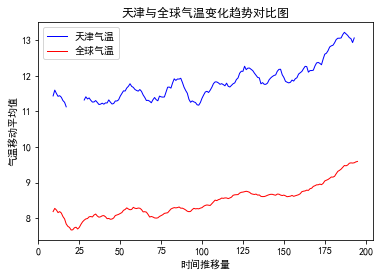

In [100]:
plt.show()

## 3 结论  
* 与全球平均气温相比，我所居住的城市（距离最近的天津）的平均气温较热，长期的气温差异较为一致
* 长期以来天津的变化趋势基本与全球平均气温变化一致
* 总体趋势有缓慢升高的趋势
* 进入2000年以来，天津的平均气温先降低后由升高  
* 全球的凭据气温趋势较为平滑，而天津市的平均气温趋势波动较大

## 4 思考
* 步骤：  
a 使用sql查询制定城市的平均气温以及指定时间范围内的全球平均气温  
b 将sql查询的结果保存为csv结构化数据  
c 使用python读取csv文件  
d 使用matplotlib进行绘图（并确保全球以及天津的横坐标范围一致）

* 使用matplotlib绘制平均线

* 将数据可视化时，考虑使用Python的第三库matplotlib，更为便捷